In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('otto_product_train.csv')
test = pd.read_csv('otto_product_test.csv')

In [3]:
print(train.shape)
print(test.shape)

(61878, 95)
(144368, 94)


### Data preprocessing

#### 1) Handling Null Values

In [4]:
nv_tr = train.isnull().sum()
nv_tr = nv_tr[nv_tr>0]
nv_tr

Series([], dtype: int64)

In [5]:
nv_te = test.isnull().sum()
nv_te = nv_te[nv_te>0]
nv_te

Series([], dtype: int64)

#### 2) Handling Duplicates

In [6]:
train.duplicated().sum()

0

In [7]:
test.duplicated().sum()

0

#### EDA

In [8]:
train['target'].value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

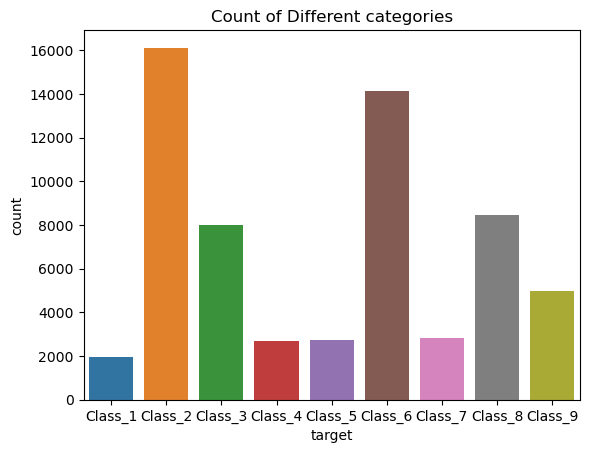

In [9]:
sns.countplot(x=train['target'])
#              order = train['target'].value_counts().sort_values(ascending=False).index)
plt.title('Count of Different categories')
plt.show()

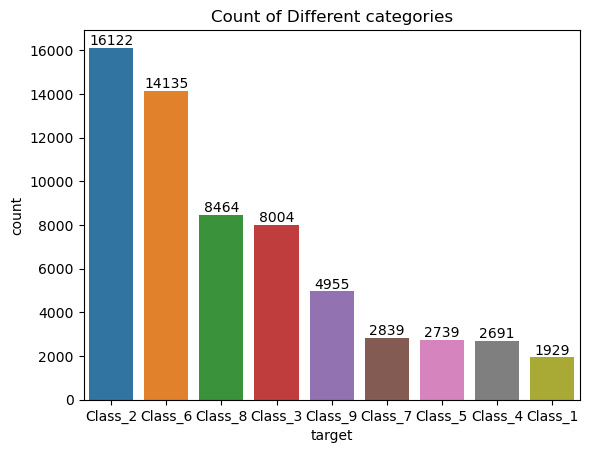

In [12]:
fig, ax = plt.subplots(1,1)
sns.countplot(x=train['target'],
             order = train['target'].value_counts().sort_values(ascending=False).index,ax=ax)
ax.bar_label(ax.containers[0])
plt.title('Count of Different categories')
plt.show()

#### Check Data Types

In [14]:
train.dtypes.value_counts()

int64     94
object     1
dtype: int64

In [15]:
test.dtypes.value_counts()

int64    94
dtype: int64

In [18]:
train.describe().T[['min','max']]

min      max
id       1.0  61878.0
feat_1   0.0     61.0
feat_2   0.0     51.0
feat_3   0.0     64.0
feat_4   0.0     70.0
...      ...      ...
feat_89  0.0     61.0
feat_90  0.0    130.0
feat_91  0.0     52.0
feat_92  0.0     19.0
feat_93  0.0     87.0

[94 rows x 2 columns]

In [19]:
train.describe().T

count          mean           std  min       25%      50%  \
id       61878.0  30939.500000  17862.784315  1.0  15470.25  30939.5   
feat_1   61878.0      0.386680      1.525330  0.0      0.00      0.0   
feat_2   61878.0      0.263066      1.252073  0.0      0.00      0.0   
feat_3   61878.0      0.901467      2.934818  0.0      0.00      0.0   
feat_4   61878.0      0.779081      2.788005  0.0      0.00      0.0   
...          ...           ...           ...  ...       ...      ...   
feat_89  61878.0      0.457772      1.527385  0.0      0.00      0.0   
feat_90  61878.0      0.812421      4.597804  0.0      0.00      0.0   
feat_91  61878.0      0.264941      2.045646  0.0      0.00      0.0   
feat_92  61878.0      0.380119      0.982385  0.0      0.00      0.0   
feat_93  61878.0      0.126135      1.201720  0.0      0.00      0.0   

              75%      max  
id       46408.75  61878.0  
feat_1       0.00     61.0  
feat_2       0.00     51.0  
feat_3       0.00     64.0  
feat_4       0.00     70.0  
...           ...      ...  
feat_89      0.00     61.0  
feat_90      0.00    130.0  
feat_91      0.00     52.0  
feat_92      0.00     19.0  
feat_93      0.00     87.0  

[94 rows x 8 columns]

In [20]:
train.describe(percentiles=[0.01,0.02,0.98,0.99]).T

count          mean           std  min      1%       2%      50%  \
id       61878.0  30939.500000  17862.784315  1.0  619.77  1238.54  30939.5   
feat_1   61878.0      0.386680      1.525330  0.0    0.00     0.00      0.0   
feat_2   61878.0      0.263066      1.252073  0.0    0.00     0.00      0.0   
feat_3   61878.0      0.901467      2.934818  0.0    0.00     0.00      0.0   
feat_4   61878.0      0.779081      2.788005  0.0    0.00     0.00      0.0   
...          ...           ...           ...  ...     ...      ...      ...   
feat_89  61878.0      0.457772      1.527385  0.0    0.00     0.00      0.0   
feat_90  61878.0      0.812421      4.597804  0.0    0.00     0.00      0.0   
feat_91  61878.0      0.264941      2.045646  0.0    0.00     0.00      0.0   
feat_92  61878.0      0.380119      0.982385  0.0    0.00     0.00      0.0   
feat_93  61878.0      0.126135      1.201720  0.0    0.00     0.00      0.0   

              98%       99%      max  
id       60640.46  61259.23  61878.0  
feat_1       4.00      6.00     61.0  
feat_2       3.00      5.00     51.0  
feat_3      12.00     15.00     64.0  
feat_4       8.00     12.00     70.0  
...           ...       ...      ...  
feat_89      4.00      6.00     61.0  
feat_90     10.00     21.00    130.0  
feat_91      2.00      4.00     52.0  
feat_92      3.00      5.00     19.0  
feat_93      1.00      2.00     87.0  

[94 rows x 10 columns]

In [23]:
print(train[train['feat_1']>6].shape)
print(train[train['feat_93']>2].shape)
print(train[train['feat_90']>21].shape)
# print(train[train['feat_1']>6].shape)

(480, 95)
(501, 95)
(613, 95)


#### Outlier Treatment

In [24]:
def outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.99))  # clip
    return x

In [25]:
train1 = train.copy()

In [27]:
cols_with_outliers = train.columns[1:-1]
print(cols_with_outliers)

Index(['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7',
       'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12', 'feat_13',
       'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19',
       'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25',
       'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30', 'feat_31',
       'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36', 'feat_37',
       'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42', 'feat_43',
       'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48', 'feat_49',
       'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54', 'feat_55',
       'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60', 'feat_61',
       'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66', 'feat_67',
       'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72', 'feat_73',
       'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79',
       'feat_80', 'feat_81', 'feat_82', 'feat_83'

In [28]:
train[cols_with_outliers] = train[cols_with_outliers].apply(outlier_treatment)

In [29]:
train.describe(percentiles=[0.01,0.02,0.98,0.99]).T

count          mean           std  min      1%       2%      50%  \
id       61878.0  30939.500000  17862.784315  1.0  619.77  1238.54  30939.5   
feat_1   61878.0      0.340476      0.982423  0.0    0.00     0.00      0.0   
feat_2   61878.0      0.213307      0.755387  0.0    0.00     0.00      0.0   
feat_3   61878.0      0.851385      2.565915  0.0    0.00     0.00      0.0   
feat_4   61878.0      0.686706      1.941417  0.0    0.00     0.00      0.0   
...          ...           ...           ...  ...     ...      ...      ...   
feat_89  61878.0      0.405669      0.991136  0.0    0.00     0.00      0.0   
feat_90  61878.0      0.626943      2.720462  0.0    0.00     0.00      0.0   
feat_91  61878.0      0.138369      0.570757  0.0    0.00     0.00      0.0   
feat_92  61878.0      0.362100      0.845641  0.0    0.00     0.00      0.0   
feat_93  61878.0      0.078962      0.331022  0.0    0.00     0.00      0.0   

              98%       99%      max  
id       60640.46  61259.23  61878.0  
feat_1       4.00      6.00      6.0  
feat_2       3.00      5.00      5.0  
feat_3      12.00     15.00     15.0  
feat_4       8.00     12.00     12.0  
...           ...       ...      ...  
feat_89      4.00      6.00      6.0  
feat_90     10.00     21.00     21.0  
feat_91      2.00      4.00      4.0  
feat_92      3.00      5.00      5.0  
feat_93      1.00      2.00      2.0  

[94 rows x 10 columns]

### Correlation

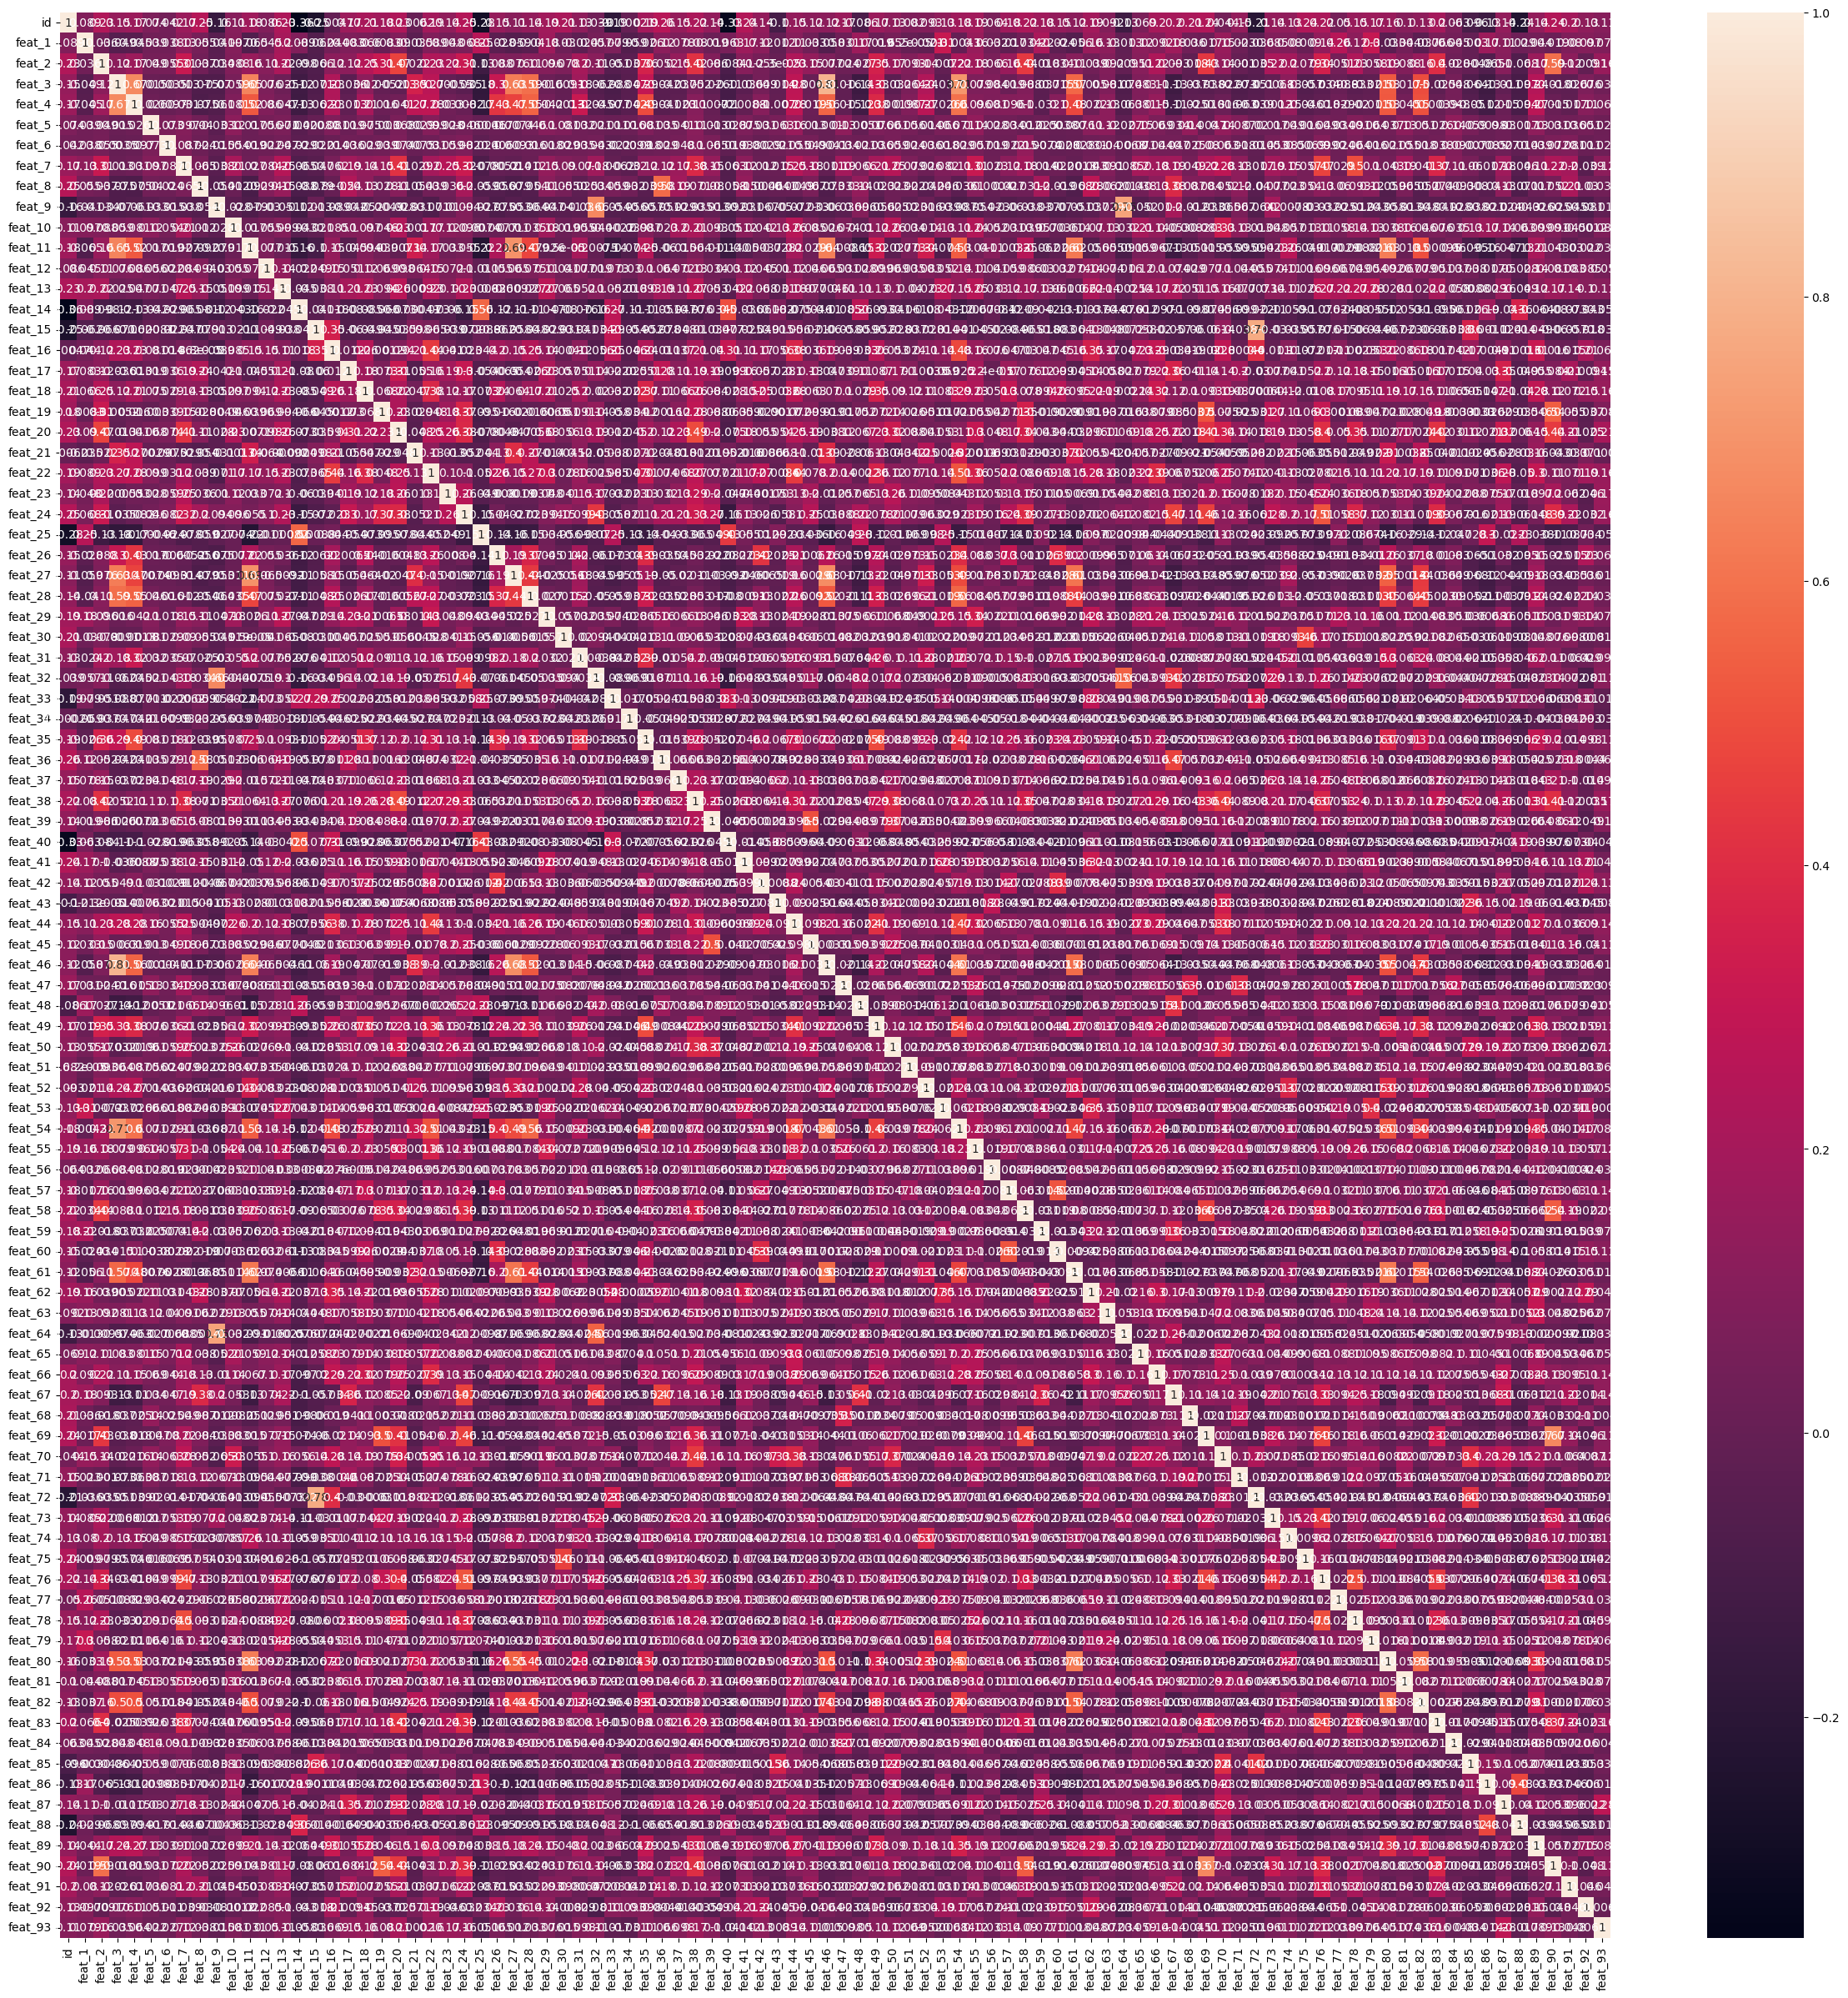

In [30]:
corr = train.iloc[1:-1].corr()

plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True)
plt.show()

#### Select x and y

In [32]:
x = train.drop(['id','target'],axis=1)
y = train['target']
print(x.shape)
print(y.shape)

(61878, 93)
(61878,)


#### Split data into train and test

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

(43314, 93)
(18564, 93)
(43314,)
(43314,)


#### Create Function to Evaluate the Model

In [37]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [ ]:
# cm
# [TP FN]
# [FP TN]

# [TN FP]
# [FN TP]

In [41]:
def eval_model(model,x_train,x_test,y_train,y_test,mname):
    model.fit(x_train,y_train)  # model training
    train_acc = model.score(x_train,y_train)  #
    test_acc = model.score(x_test,y_test)
    ypred  = model.predict(x_test) # prediction res
    cm = confusion_matrix(y_test,ypred)
    crep  = classification_report(y_test,ypred)
    print('Confusion_matrix\n',cm)
    print('Classification Report\n',crep)
    res = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc},index=[mname])
    return res

#### Import Different ML Models

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

#### 1) KNN 

In [47]:
knn1 = KNeighborsClassifier(n_neighbors=21)
knn1_res  = eval_model(knn1,x_train,x_test,y_train,y_test,'KNN(n=21)')
knn1_res

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Confusion_matrix
 [[ 263   30    3    0    4   41   21   77  148]
 [   3 4137  589   20   13    5   20    5    8]
 [   1 1242 1067   18    1    5   20    4    3]
 [   2  433  182  136    6   17   10    0    1]
 [   3   19    1    0  817    0    4    0    1]
 [  36   79   11    5    3 3941   57   80   78]
 [  31  122   80    4    8   54  464   71   12]
 [  46   47   16    0    4  105   31 2179   62]
 [  31   46    4    1    4   56    6   67 1343]]
Classification Report
               precision    recall  f1-score   support

     Class_1       0.63      0.45      0.52       587
     Class_2       0.67      0.86      0.76      4800
     Class_3       0.55      0.45      0.49      2361
     Class_4       0.74      0.17      0.28       787
     Class_5       0.95      0.97      0.96       845
     Class_6       0.93      0.92      0.93      4290
     Class_7       0.73      0.55      0.63       846
     Class_8       0.88      0.88      0.88      2490
     Class_9       0.81      0.86      

Train_Acc  Test_Acc
KNN(n=21)   0.786859   0.77284

#### 2) Logistic Regression

In [48]:
logreg1 = LogisticRegression(max_iter=100000)
logres1_res  = eval_model(logreg1,x_train,x_test,y_train,y_test,'LogReg')
logres1_res

Confusion_matrix
 [[ 240   23    0    1    2   54   13  111  143]
 [   8 4127  535   40   12   15   26   27   10]
 [   1 1498  772   26    0    3   47   11    3]
 [   0  406   67  250    6   28   25    1    4]
 [   0   34    0    0  809    0    0    2    0]
 [  27   46   10   12    2 3945   41  121   86]
 [  24  129   53    3    8   79  483   60    7]
 [  60   36    5    0    0   85   28 2244   32]
 [  51   39    4    1    4   66    5   82 1306]]
Classification Report
               precision    recall  f1-score   support

     Class_1       0.58      0.41      0.48       587
     Class_2       0.65      0.86      0.74      4800
     Class_3       0.53      0.33      0.41      2361
     Class_4       0.75      0.32      0.45       787
     Class_5       0.96      0.96      0.96       845
     Class_6       0.92      0.92      0.92      4290
     Class_7       0.72      0.57      0.64       846
     Class_8       0.84      0.90      0.87      2490
     Class_9       0.82      0.84      

Train_Acc  Test_Acc
LogReg   0.767027  0.763629

#### 3) DecisionTree Classifier

In [51]:
dt1 = DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_split=20)
dt1_res  = eval_model(dt1,x_train,x_test,y_train,y_test,'DT_cls')
dt1_res

Confusion_matrix
 [[  45   61    1    0    0   47   19  259  155]
 [   3 4057  425   68    3   35   21  149   39]
 [   3 1464  700   52    0   19   27   84   12]
 [   0  440   65  209    4   37    4   25    3]
 [   0   29    0    0  769    2    0   41    4]
 [  19  108   10   11    0 3790   42  216   94]
 [   2  211   33   14    3   79  275  202   27]
 [  28  136   22    3    1   89   26 2093   92]
 [  29  142    7    3    4   87   12  263 1011]]
Classification Report
               precision    recall  f1-score   support

     Class_1       0.35      0.08      0.13       587
     Class_2       0.61      0.85      0.71      4800
     Class_3       0.55      0.30      0.39      2361
     Class_4       0.58      0.27      0.36       787
     Class_5       0.98      0.91      0.94       845
     Class_6       0.91      0.88      0.89      4290
     Class_7       0.65      0.33      0.43       846
     Class_8       0.63      0.84      0.72      2490
     Class_9       0.70      0.65      

Train_Acc  Test_Acc
DT   0.733412  0.697533

#### 4) BaggingClassifier

In [52]:
x_train.shape

(43314, 93)

In [53]:
dt_base = DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_split=10)

bagcls1 = BaggingClassifier(base_estimator=dt_base,n_estimators=30,
                             max_features=x_train.shape[1],max_samples=x_train.shape[0])
bagcls1_res  = eval_model(bagcls1,x_train,x_test,y_train,y_test,'Bagging_Cls')
bagcls1_res

Confusion_matrix
 [[  58  130    5    2    2   54   26  162  148]
 [   0 4292  370   37    5   18   12   38   28]
 [   0 1542  729   22    0    8   20   29   11]
 [   0  447   68  220    4   33    1    9    5]
 [   0   36    0    0  797    1    0   11    0]
 [  11  172    6    6    1 3839   33  139   83]
 [   6  260   24    9    4   71  336  111   25]
 [   6  155    9    1    5   62   20 2180   52]
 [   5  152    2    1    8   73    8  105 1204]]
Classification Report
               precision    recall  f1-score   support

     Class_1       0.67      0.10      0.17       587
     Class_2       0.60      0.89      0.72      4800
     Class_3       0.60      0.31      0.41      2361
     Class_4       0.74      0.28      0.41       787
     Class_5       0.96      0.94      0.95       845
     Class_6       0.92      0.89      0.91      4290
     Class_7       0.74      0.40      0.52       846
     Class_8       0.78      0.88      0.83      2490
     Class_9       0.77      0.77      

Train_Acc  Test_Acc
Bagging_Cls   0.774045  0.735563

#### 5) RandomForest Classifier

In [56]:
rf1 = RandomForestClassifier(n_estimators=80,max_depth=20,min_samples_split=14)
rf1_res  = eval_model(rf1,x_train,x_test,y_train,y_test,'RF_Cls')
rf1_res

Confusion_matrix
 [[ 123   48    0    0    2   73    5  174  162]
 [   1 4452  283   21    7   10    8   12    6]
 [   0 1592  721   20    0    5    9   11    3]
 [   0  459   59  228    4   33    4    0    0]
 [   0   39    0    0  799    2    0    4    1]
 [   3   75    3    4    0 4027   31   90   57]
 [   1  191   37    9    3   79  389  127   10]
 [   1   43    4    0    1   72    6 2337   26]
 [   3   79    0    1    3   76    3   79 1314]]
Classification Report
               precision    recall  f1-score   support

     Class_1       0.93      0.21      0.34       587
     Class_2       0.64      0.93      0.76      4800
     Class_3       0.65      0.31      0.42      2361
     Class_4       0.81      0.29      0.43       787
     Class_5       0.98      0.95      0.96       845
     Class_6       0.92      0.94      0.93      4290
     Class_7       0.85      0.46      0.60       846
     Class_8       0.82      0.94      0.88      2490
     Class_9       0.83      0.84      

Train_Acc  Test_Acc
RF_Cls   0.844138  0.775156

#### Hyper parameter Tuning

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
hparams = { 'n_estimators' : [60,70,80,90,100],
            'max_depth' : [10,15,20],
            'min_samples_split' : [10,15,20]}

# 5 * 3 * 3 = 45

print(hparams)

{'n_estimators': [60, 70, 80, 90, 100], 'max_depth': [10, 15, 20], 'min_samples_split': [10, 25, 20]}


In [63]:
rf_base = RandomForestClassifier(criterion='gini')

# cv = cross validation
rs_cv1 = RandomizedSearchCV(estimator=rf_base,param_distributions=hparams,cv=5,
                            scoring='accuracy')
rs_cv1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 15, 20],
                                        'min_samples_split': [10, 25, 20],
                                        'n_estimators': [60, 70, 80, 90, 100]},
                   scoring='accuracy')

In [64]:
print(rs_cv1.best_score_)
print(rs_cv1.best_estimator_)

0.7682504406447503
RandomForestClassifier(max_depth=20, min_samples_split=20, n_estimators=70)


#### 6) AdaBoost Classifier

In [57]:
dt_base1 = DecisionTreeClassifier(random_state=0)

adab1 = AdaBoostClassifier(base_estimator=dt_base1,n_estimators=70)
adab1_res  = eval_model(adab1,x_train,x_test,y_train,y_test,'AdaBoost_Cls')
adab1_res

Confusion_matrix
 [[ 227   19    4    0    3   54   18  143  119]
 [   0 4190  536   19    3    6   24   14    8]
 [   0 1160 1139   24    0    5   22    8    3]
 [   1  328  133  291    4   23    6    1    0]
 [   0    9    1    0  826    1    3    3    2]
 [   9   47    4    8    1 4062   39   74   46]
 [   3   87   75    9    9   64  503   88    8]
 [  10   27   12    1    2   81   14 2315   28]
 [  26   26    2    0    4   65    5   65 1365]]
Classification Report
               precision    recall  f1-score   support

     Class_1       0.82      0.39      0.53       587
     Class_2       0.71      0.87      0.78      4800
     Class_3       0.60      0.48      0.53      2361
     Class_4       0.83      0.37      0.51       787
     Class_5       0.97      0.98      0.97       845
     Class_6       0.93      0.95      0.94      4290
     Class_7       0.79      0.59      0.68       846
     Class_8       0.85      0.93      0.89      2490
     Class_9       0.86      0.88      

Train_Acc  Test_Acc
AdaBoost_Cls   0.999977  0.803598

#### Tabulate All Results

In [59]:
res = pd.concat([knn1_res,logres1_res,dt1_res,bagcls1_res,rf1_res,adab1_res])
res

Train_Acc  Test_Acc
KNN(n=21)      0.786859  0.772840
LogReg         0.767027  0.763629
DT             0.733412  0.697533
Bagging_Cls    0.774045  0.735563
RF_Cls         0.844138  0.775156
AdaBoost_Cls   0.999977  0.803598

#### Inference
Best Model selected :  RandomForestClassifier

#### Final Model

In [65]:
rf_final = RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=20, 
                                  min_samples_split=20)

rf_final.fit(x,y)  # Entire train data

RandomForestClassifier(max_depth=20, min_samples_split=20, n_estimators=70)

In [66]:
test_data = test.drop('id',axis=1)

In [67]:
print(x.shape)
print(test_data.shape)

(61878, 93)
(144368, 93)


#### Generate predictions on test data

In [68]:
ypred_test = rf_final.predict(test_data)

In [69]:
submission = pd.DataFrame({'ID':test['id'],'Predictions':ypred_test})
submission.head(10)

ID Predictions
0   1     Class_4
1   2     Class_6
2   3     Class_6
3   4     Class_2
4   5     Class_8
5   6     Class_3
6   7     Class_8
7   8     Class_2
8   9     Class_2
9  10     Class_2

#### Saving the Model

In [70]:
import pickle

In [72]:
pickle.dump(rf_final,open('rf_model_otto_prod_cls_21Oct23.pkl','wb'))
# wb = write binary

In [73]:
model = pickle.load(open('rf_model_otto_prod_cls_21Oct23.pkl','rb'))
# rb = read binary